In [2]:
import uproot
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# THIS IS WHERE YOU CHOOSE CONFIG

In [3]:
################# THIS IS WHERE YOU CHOOSE CONFIG ################################
title = "Variable Importance Table 2 Layers"  # title for figure

model_name = 'twoLayerModel_weights_gpu_mumu0'
path_to_model = "../models/two_layers/" + model_name

event_type = "mumu"  # could be ee, emu, mumu
root_path = "/depot-new/cms/top/mcnama20/TopSpinCorr-Run2-Entanglement/CMSSW_10_2_22/src/TopAnalysis/Configuration/analysis/diLeptonic/three_files/Nominal"

file = root_path + "/" + event_type + "_modified_root_1.root"

In [4]:
# make a list of channels
channels = ["ee", "emu", "mumu"]

# get the list of input variables
events = uproot.open(file)
key = events.keys()[0]
input_variables = events[key].keys()

In [5]:
# remove extra stuff not given to classifier
input_variables.pop(82)
input_variables.pop(81)
input_variables.pop(80)

'production_mode'

# Collect Derivative Analysis for models

In [6]:
# note that we care about the absolute values of these
first_done = False
for channel in channels:
    model_name = 'twoLayerModel_weights_gpu_' + channel + '0'

    if not first_done:
        df = np.abs(pd.DataFrame(np.load("./results/derivative_importance" + model_name + ".npy"), index=input_variables, columns=[channel + '_derivative']))
        first_done = True
    else:
        df[channel + '_derivative'] = np.abs(np.load("./results/derivative_importance" + model_name + ".npy"))
        

In [7]:
df

,ee_derivative,emu_derivative,mumu_derivative
lb_delta_eta,0.132902,0.017601,0.433754
lbbar_delta_eta,0.101107,0.059774,0.206840
lnu_delta_eta,0.152861,0.001602,0.649757
lnubar_delta_eta,0.080896,0.055661,1.000000
lbarb_delta_eta,0.080074,0.048645,0.184914
...,...,...,...
ttbar_pt,1.000000,1.000000,0.736099
ttbar_boosted_pt,0.190186,0.157140,0.532733
wplus_pt,0.034355,0.240749,0.561849
wminus_pt,0.576841,0.060629,0.062320


# Collect Permutation Analysis for models

In [8]:
for channel in channels:
    model_name = 'twoLayerModel_weights_gpu_' + channel + '0'
    df[channel + '_permutation'] = np.load("./results/permutation_importance" + model_name + ".npy")
        

In [9]:
df

,ee_derivative,emu_derivative,mumu_derivative,ee_permutation,emu_permutation,mumu_permutation
lb_delta_eta,0.132902,0.017601,0.433754,0.041637,0.036825,0.058376
lbbar_delta_eta,0.101107,0.059774,0.206840,0.029172,0.030545,0.060485
lnu_delta_eta,0.152861,0.001602,0.649757,0.029681,0.032304,0.050913
lnubar_delta_eta,0.080896,0.055661,1.000000,0.032834,0.024569,0.030909
lbarb_delta_eta,0.080074,0.048645,0.184914,0.038641,0.033929,0.053371
...,...,...,...,...,...,...
ttbar_pt,1.000000,1.000000,0.736099,0.088128,0.076464,0.089879
ttbar_boosted_pt,0.190186,0.157140,0.532733,0.011650,0.008211,0.018828
wplus_pt,0.034355,0.240749,0.561849,0.014554,0.022180,0.038406
wminus_pt,0.576841,0.060629,0.062320,0.017457,0.021943,0.017216


# Normalize columns and stuff

In [12]:
max_list = []
for col in df:
    max_list.append(df[col].max())
    df[col] = df[col]/max(df[col])
max_list

[1.0, 1.0, 1.0, 0.08812760055478507, 0.07646424101169663, 0.08987856186651362]

# Plot Heatmap

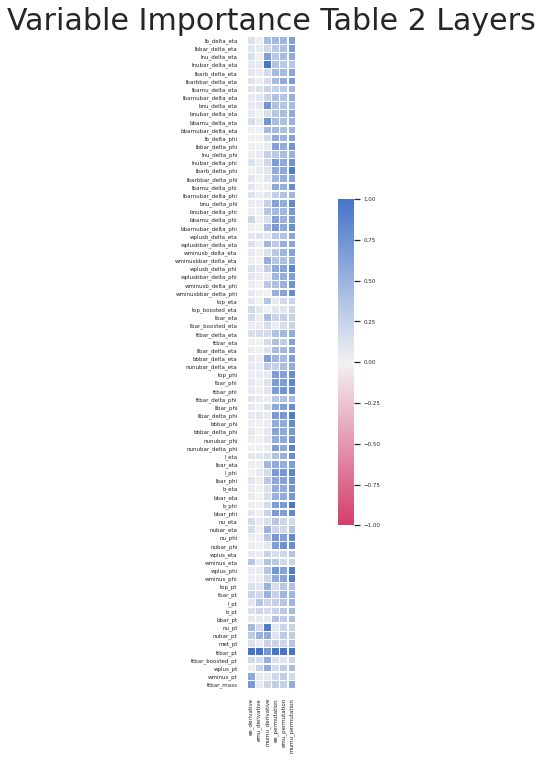

In [13]:
sns.set(font_scale=0.5)
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(0,255,sep=1, as_cmap=True)
hm = sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, vmin=-1, vmax=1)

plt.title(title, fontsize=30)
plt.savefig('./results/' + title + '.pdf')

# sort and make a new plot

In [15]:
df['averages'] = df.mean(axis=1)
df

,ee_derivative,emu_derivative,mumu_derivative,ee_permutation,emu_permutation,mumu_permutation,averages
lb_delta_eta,0.132902,0.017601,0.433754,0.472458,0.481599,0.649503,0.364636
lbbar_delta_eta,0.101107,0.059774,0.206840,0.331025,0.399469,0.672961,0.295196
lnu_delta_eta,0.152861,0.001602,0.649757,0.336796,0.422471,0.566466,0.354992
lnubar_delta_eta,0.080896,0.055661,1.000000,0.372574,0.321320,0.343901,0.362392
lbarb_delta_eta,0.080074,0.048645,0.184914,0.438464,0.443723,0.593808,0.298271
...,...,...,...,...,...,...,...
ttbar_pt,1.000000,1.000000,0.736099,1.000000,1.000000,1.000000,0.956016
ttbar_boosted_pt,0.190186,0.157140,0.532733,0.132200,0.107389,0.209479,0.221521
wplus_pt,0.034355,0.240749,0.561849,0.165145,0.290077,0.427310,0.286581
wminus_pt,0.576841,0.060629,0.062320,0.198090,0.286972,0.191553,0.229401


In [20]:
df = df.sort_values(by=['averages'], ascending=False)
df

,ee_derivative,emu_derivative,mumu_derivative,ee_permutation,emu_permutation,mumu_permutation,averages
ttbar_pt,1.000000,1.000000,0.736099,1.000000,1.000000,1.000000,0.956016
wplus_phi,0.059613,0.050945,0.354094,0.713566,0.631491,0.952604,0.460386
nu_phi,0.023835,0.024169,0.338574,0.720071,0.659291,0.839619,0.434260
b_phi,0.032151,0.017294,0.173890,0.676319,0.690703,0.988563,0.429820
llbar_delta_phi,0.073537,0.083134,0.058085,0.701500,0.704222,0.943933,0.427402
...,...,...,...,...,...,...,...
nu_eta,0.184214,0.058348,0.150264,0.347078,0.212604,0.189691,0.190366
wplus_eta,0.048065,0.048484,0.248959,0.151925,0.217374,0.374594,0.181567
top_eta,0.081952,0.003768,0.353109,0.062008,0.190026,0.219161,0.151671
top_boosted_eta,0.190810,0.091793,0.022457,0.092120,0.101942,0.213894,0.118836


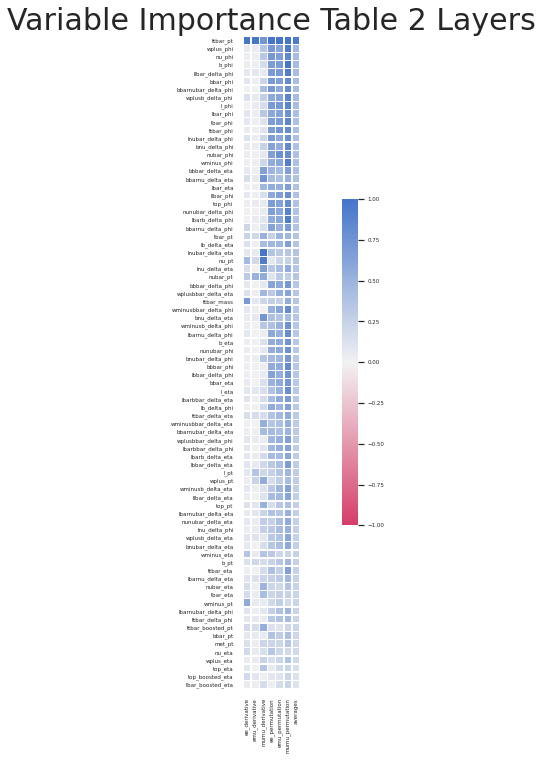

In [21]:
sns.set(font_scale=0.5)
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(0,255,sep=1, as_cmap=True)
hm = sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, vmin=-1, vmax=1)

plt.title(title, fontsize=30)
plt.savefig('./results/sorted_' + title + '.pdf')

# Save useful stuff

In [22]:
# save numpy array of average importance

np.save("./results/twoLayer_averages.npy",df['averages'])